In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [6]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/loan_approval_dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
print(df.shape)
print(df.info())
print(df.head())

(4269, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None

In [8]:
# Drop loan_id (not useful for prediction)
df.drop("loan_id", axis=1, inplace=True)

In [9]:
# Check for missing values
print(df.isnull().sum())

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [10]:
print(df.columns.tolist())

[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [11]:
df.columns = df.columns.str.strip()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [13]:
df[['education', 'self_employed', 'loan_status']] = df[['education', 'self_employed', 'loan_status']].apply(lambda x: x.str.strip())

In [14]:
print(df['education'].unique())
print(df['self_employed'].unique())
print(df['loan_status'].unique())

['Graduate' 'Not Graduate']
['No' 'Yes']
['Approved' 'Rejected']


In [15]:
df['education'] = df['education'].replace({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].replace({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].replace({'Approved': 1, 'Rejected': 0})


/tmp/ipython-input-15-3616841876.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace({'Graduate': 1, 'Not Graduate': 0})
/tmp/ipython-input-15-3616841876.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['self_employed'] = df['self_employed'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-15-3616841876.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

In [16]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


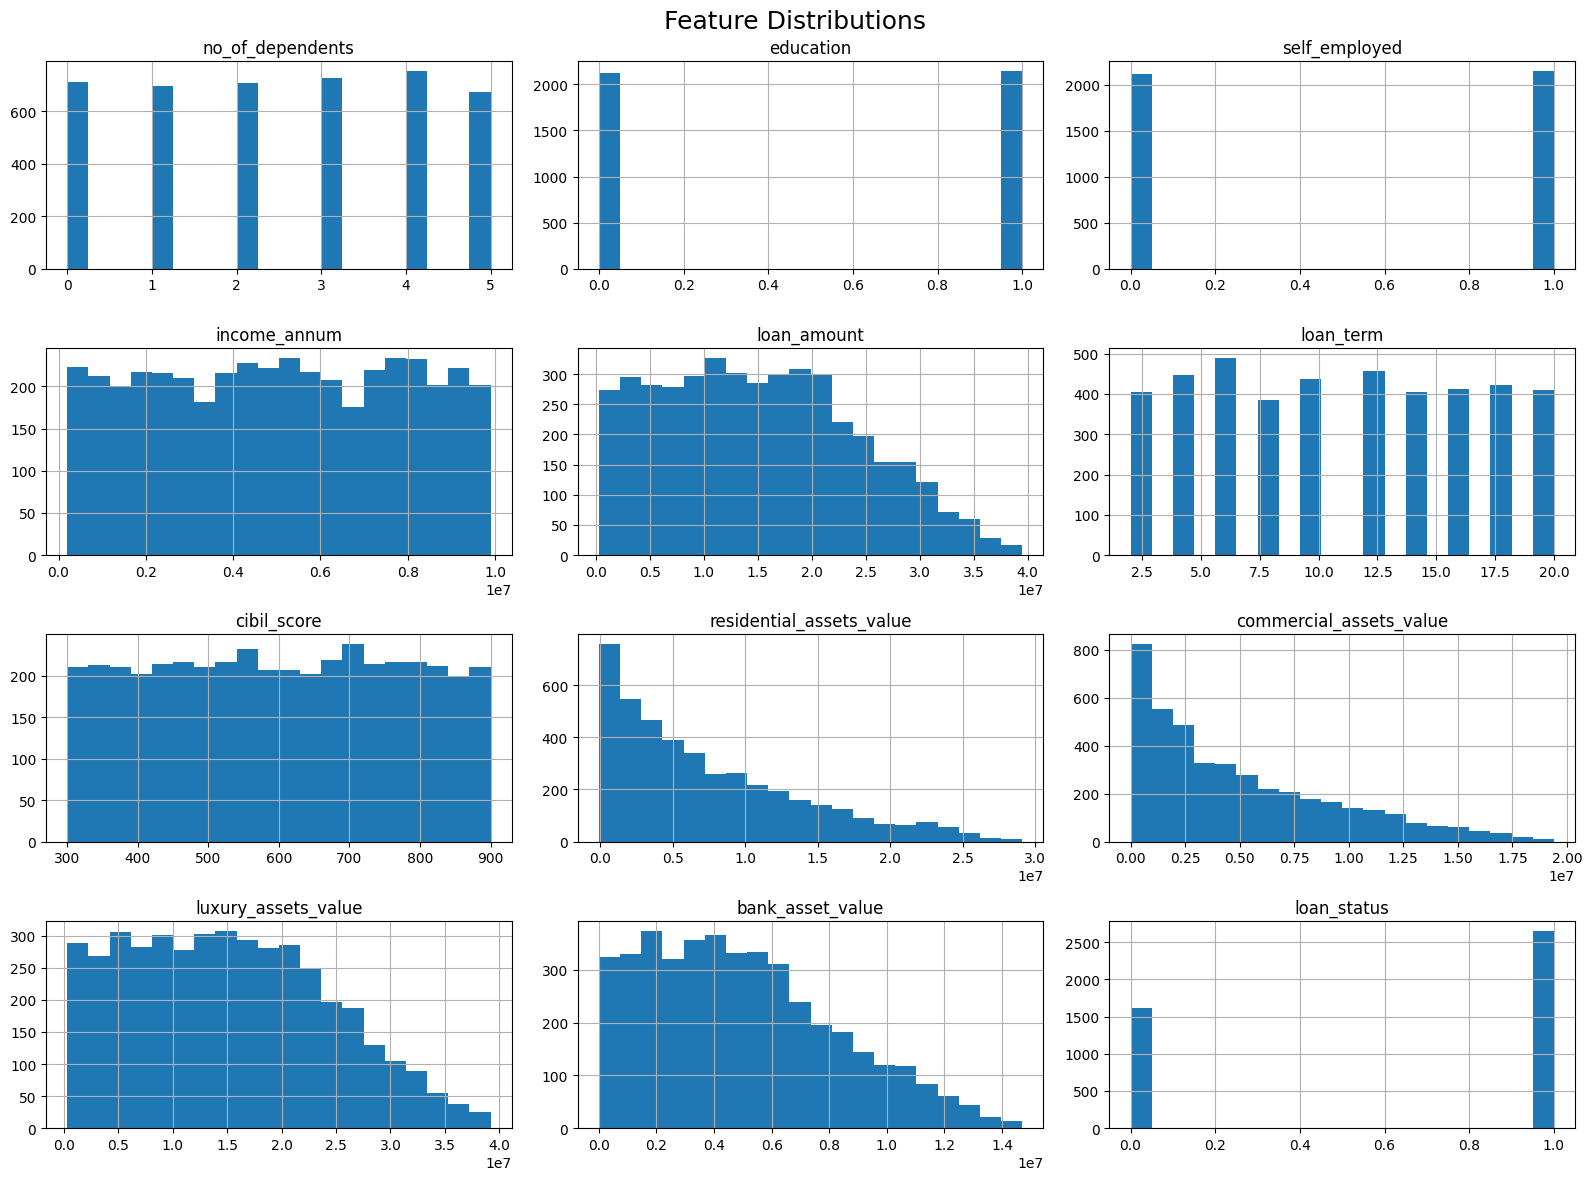

In [17]:
df.hist(bins=20, figsize=(16, 12), layout=(4, 3))
plt.suptitle("Feature Distributions", fontsize=18)
plt.tight_layout()
plt.show()

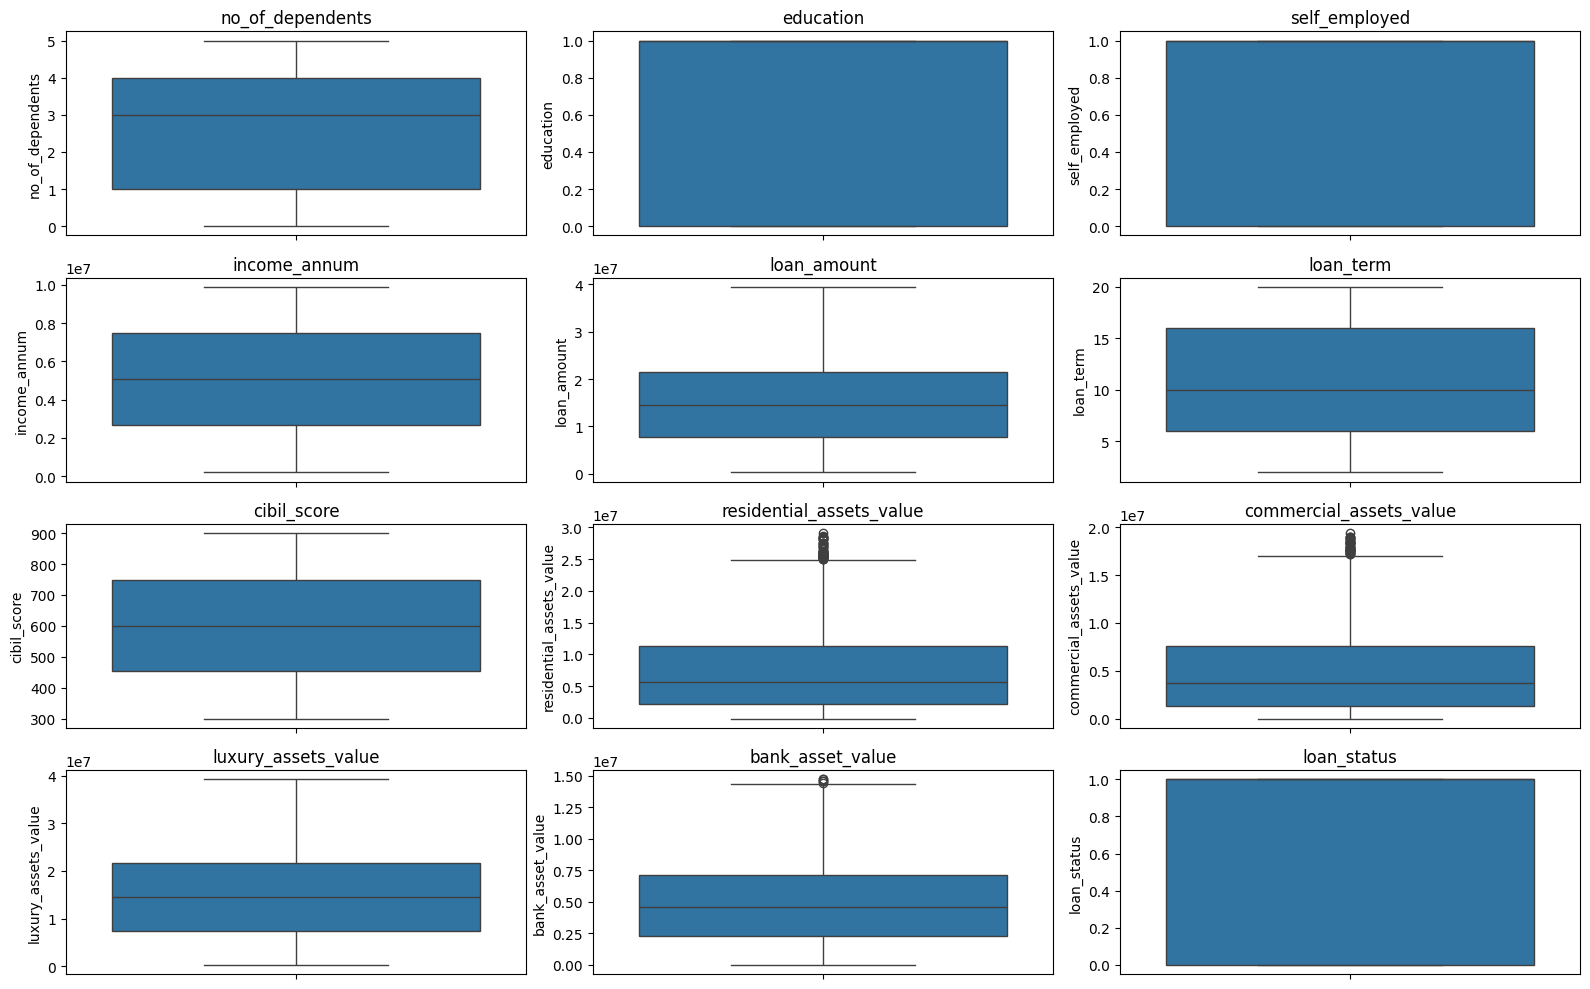

In [18]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(df.select_dtypes(include='number').columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


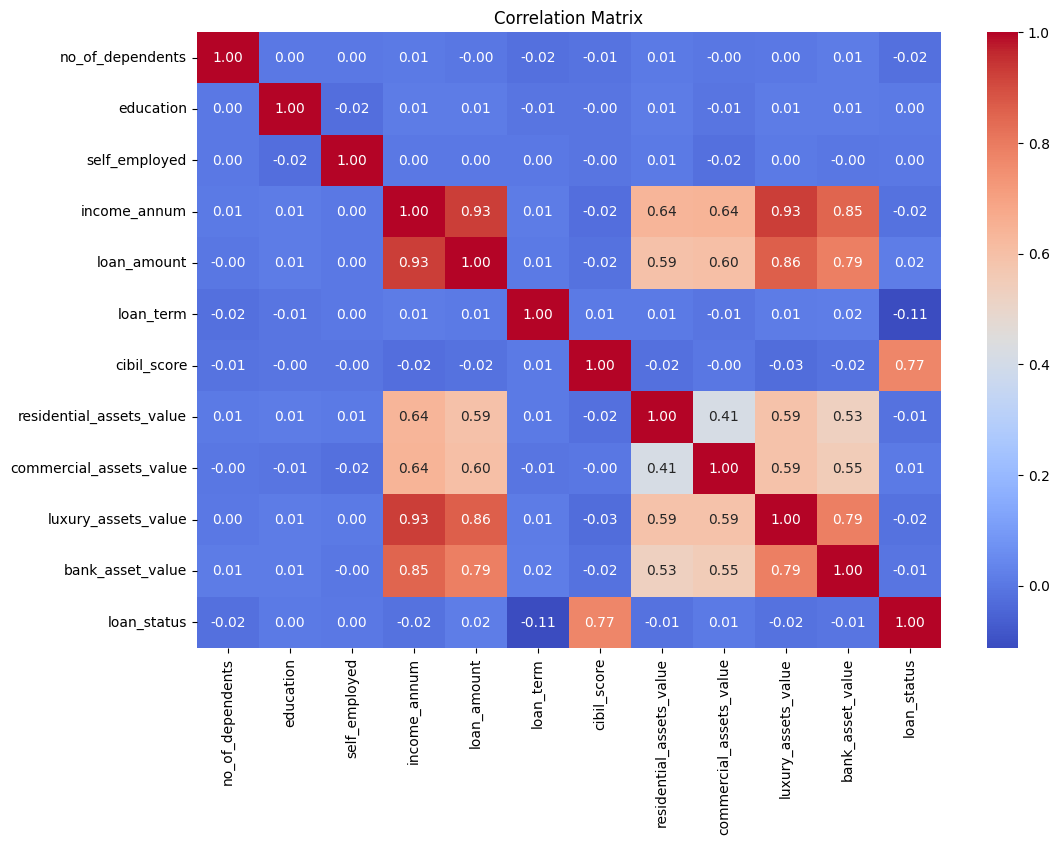

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [20]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop('loan_status', axis=1).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [21]:
df.head

<bound method NDFrame.head of       no_of_dependents  education  self_employed  income_annum  loan_amount  \
0            -0.294102   0.995559      -1.007288      1.617979     1.633052   
1            -1.473548  -1.004461       0.992765     -0.341750    -0.324414   
2             0.295621   0.995559      -1.007288      1.439822     1.610933   
3             0.295621   0.995559      -1.007288      1.119139     1.721525   
4             1.475067  -1.004461       0.992765      1.689242     1.002681   
...                ...        ...            ...           ...          ...   
4264          1.475067   0.995559       0.992765     -1.446324    -1.419268   
4265         -1.473548  -1.004461       0.992765     -0.626801    -0.423946   
4266         -0.294102  -1.004461      -1.007288      0.513405     0.969504   
4267         -0.883825  -1.004461      -1.007288     -0.341750    -0.258059   
4268         -0.883825   0.995559      -1.007288      1.475453     1.610933   

      loan_term  cibil_score  residential_assets_value  \
0      0.192617     1.032792                 -0.780058   
1     -0.508091    -1.061051                 -0.733924   
2      1.594031    -0.544840                 -0.057300   
3     -0.508091    -0.771045                  1.649637   
4      1.594031    -1.264055                  0.757724   
...         ...          ...                       ...   
4264   0.192617    -1.641063                 -0.718546   
4265   1.594031    -0.237434                 -0.503257   
4266   1.243677    -0.829046                 -0.964591   
4267  -0.508091     1.044393                  0.111856   
4268  -0.157737     0.040972                  1.588126   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    2.877289             0.832028          0.930304   
1                   -0.631921            -0.694993         -0.515936   
2                   -0.107818             1.996520          2.407316   
3                   -0.381263             0.897943          0.899533   
4                    0.735304             1.568075          0.007172   
...                       ...                  ...               ...   
4264                -1.019301            -1.299210         -1.285213   
4265                -0.472412            -0.453306         -0.946732   
4266                 1.692361             0.326683          0.714907   
4267                -0.973727            -0.112748          0.253341   
4268                 1.555638             2.260178          2.161148   

      loan_status  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
4264            0  
4265            1  
4266            0  
4267            1  
4268            1  

[4269 rows x 12 columns]>

In [22]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
